In [367]:
import pandas as pd

df = pd.read_csv("/content/Food data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1485 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB


In [368]:
#add a new column to check for todays food wastage
df['today_waste_kg'] = df['past_waste_kg'].shift(-1)
df.drop(columns=['past_waste_kg'],inplace=True)


# 1. Data Cleaning

In [369]:
null_count =df.isnull().sum()
null_count

,0
ID,0
date,0
meals_served,32
kitchen_staff,18
temperature_C,0
humidity_percent,16
day_of_week,0
special_event,0
staff_experience,337
waste_category,21


In [370]:
null_percent =(df.isnull().sum() / len(df)) * 100
null_percent


,0
ID,0.000000
date,0.000000
meals_served,1.756312
kitchen_staff,0.987925
temperature_C,0.000000
humidity_percent,0.878156
day_of_week,0.000000
special_event,0.000000
staff_experience,18.496158
waste_category,1.152580


In [371]:
for col in df.columns:
    print(f"\n--- Value counts (%): {col} ---")
    percent = df[col].value_counts(normalize=True, dropna=False) * 100
    print(percent.round(2).astype(str) + '%')


--- Value counts (%): ID ---
ID
1821    0.05%
0       0.05%
1       0.05%
2       0.05%
3       0.05%
        ...  
18      0.05%
17      0.05%
16      0.05%
15      0.05%
14      0.05%
Name: proportion, Length: 1822, dtype: object

--- Value counts (%): date ---
date
2/2/2022     0.22%
1/11/2022    0.22%
1/27/2022    0.22%
2/14/2022    0.22%
1/6/2022     0.22%
             ...  
4/2/2024     0.11%
9/4/2023     0.11%
1/17/2024    0.11%
3/20/2024    0.11%
6/27/2022    0.11%
Name: proportion, Length: 867, dtype: object

--- Value counts (%): meals_served ---
meals_served
NaN       1.76%
259.0     0.77%
352.0     0.77%
485.0     0.77%
291.0     0.77%
          ...  
117.0     0.11%
4680.0    0.05%
284.0     0.05%
102.0     0.05%
2080.0    0.05%
Name: proportion, Length: 374, dtype: object

--- Value counts (%): kitchen_staff ---
kitchen_staff
12        7.85%
5         7.57%
10        7.14%
13        6.97%
9         6.97%
15        6.75%
18        6.64%
7         6.42%
14        6.42%
19 

In [372]:
# Replace values in the 'waste_category','kitchen_staff','waste_category','staff_experience' columns

df['waste_category'] = df['waste_category'].replace({
    'MeAt': 'MEAT'
})

df['staff_experience'] = df['staff_experience'].replace({
    'intermediate': 'Intermediate'
})

df['special_event'] = df['special_event'].astype(str).str.strip().replace({
    'One': '1'
})

df['kitchen_staff'] = df['kitchen_staff'].astype(str).str.strip().replace({
    'ten': '10',
    'eleven': '11'
})

In [373]:
for col in df.columns:
    print(f"\n--- Value counts (%): {col} ---")
    percent = df[col].value_counts(normalize=True, dropna=False) * 100
    print(percent.round(2).astype(str) + '%')


--- Value counts (%): ID ---
ID
1821    0.05%
0       0.05%
1       0.05%
2       0.05%
3       0.05%
        ...  
18      0.05%
17      0.05%
16      0.05%
15      0.05%
14      0.05%
Name: proportion, Length: 1822, dtype: object

--- Value counts (%): date ---
date
2/2/2022     0.22%
1/11/2022    0.22%
1/27/2022    0.22%
2/14/2022    0.22%
1/6/2022     0.22%
             ...  
4/2/2024     0.11%
9/4/2023     0.11%
1/17/2024    0.11%
3/20/2024    0.11%
6/27/2022    0.11%
Name: proportion, Length: 867, dtype: object

--- Value counts (%): meals_served ---
meals_served
NaN       1.76%
259.0     0.77%
352.0     0.77%
485.0     0.77%
291.0     0.77%
          ...  
117.0     0.11%
4680.0    0.05%
284.0     0.05%
102.0     0.05%
2080.0    0.05%
Name: proportion, Length: 374, dtype: object

--- Value counts (%): kitchen_staff ---
kitchen_staff
12     7.85%
5      7.57%
10     7.35%
13     6.97%
9      6.97%
15     6.75%
18     6.64%
11     6.48%
7      6.42%
14     6.42%
19     6.37%
6   

In [374]:

for val in df['kitchen_staff'].unique():
    print(f"__{val}__")

__13__
__15__
__16__
__19__
__10__
__18__
__7__
__5__
__12__
__8__
__17__
__11__
__9__
__6__
__nan__
__14__


**Change Data type of date Column**

In [375]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1822 non-null   int64         
 1   date              1822 non-null   datetime64[ns]
 2   meals_served      1790 non-null   float64       
 3   kitchen_staff     1822 non-null   object        
 4   temperature_C     1822 non-null   float64       
 5   humidity_percent  1806 non-null   float64       
 6   day_of_week       1822 non-null   int64         
 7   special_event     1822 non-null   object        
 8   staff_experience  1485 non-null   object        
 9   waste_category    1801 non-null   object        
 10  today_waste_kg    1805 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 156.7+ KB


**Fix Nan values in Continuous Columns**

In [377]:
df.nunique()

,0
ID,1822
date,867
meals_served,373
kitchen_staff,16
temperature_C,892
humidity_percent,867
day_of_week,7
special_event,2
staff_experience,4
waste_category,6


In [378]:
null_percent =(df.isnull().sum() / len(df)) * 100
null_percent


,0
ID,0.000000
date,0.000000
meals_served,1.756312
kitchen_staff,0.000000
temperature_C,0.000000
humidity_percent,0.878156
day_of_week,0.000000
special_event,0.000000
staff_experience,18.496158
waste_category,1.152580


In [379]:
continuous_columns=['meals_served','kitchen_staff','temperature_C','humidity_percent','today_waste_kg']

df['kitchen_staff'] = df['kitchen_staff'].astype('float64')

df.info()
null_percent =(df.isnull().sum() / len(df)) * 100
null_percent

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1822 non-null   int64         
 1   date              1822 non-null   datetime64[ns]
 2   meals_served      1790 non-null   float64       
 3   kitchen_staff     1804 non-null   float64       
 4   temperature_C     1822 non-null   float64       
 5   humidity_percent  1806 non-null   float64       
 6   day_of_week       1822 non-null   int64         
 7   special_event     1822 non-null   object        
 8   staff_experience  1485 non-null   object        
 9   waste_category    1801 non-null   object        
 10  today_waste_kg    1805 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 156.7+ KB


,0
ID,0.000000
date,0.000000
meals_served,1.756312
kitchen_staff,0.987925
temperature_C,0.000000
humidity_percent,0.878156
day_of_week,0.000000
special_event,0.000000
staff_experience,18.496158
waste_category,1.152580


In [380]:

for col in continuous_columns:
    print(f"\nSummary of {col}:")
    print("median",df[col].median())
    print(df[col].describe())


Summary of meals_served:
median 306.0
count    1790.000000
mean      373.512849
std       494.791973
min       100.000000
25%       211.250000
50%       306.000000
75%       407.000000
max      4730.000000
Name: meals_served, dtype: float64

Summary of kitchen_staff:
median 12.0
count    1804.000000
mean       11.904656
std         4.291746
min         5.000000
25%         8.000000
50%        12.000000
75%        15.000000
max        19.000000
Name: kitchen_staff, dtype: float64

Summary of temperature_C:
median 22.11503968
count    1822.000000
mean       22.189280
std         8.919939
min       -10.372207
25%        15.684259
50%        22.115040
75%        28.807494
max        60.000000
Name: temperature_C, dtype: float64

Summary of humidity_percent:
median 61.63493525
count    1806.000000
mean       60.791257
std        17.326232
min        30.121111
25%        46.035158
50%        61.634935
75%        75.789317
max        89.982828
Name: humidity_percent, dtype: float64

Summary 

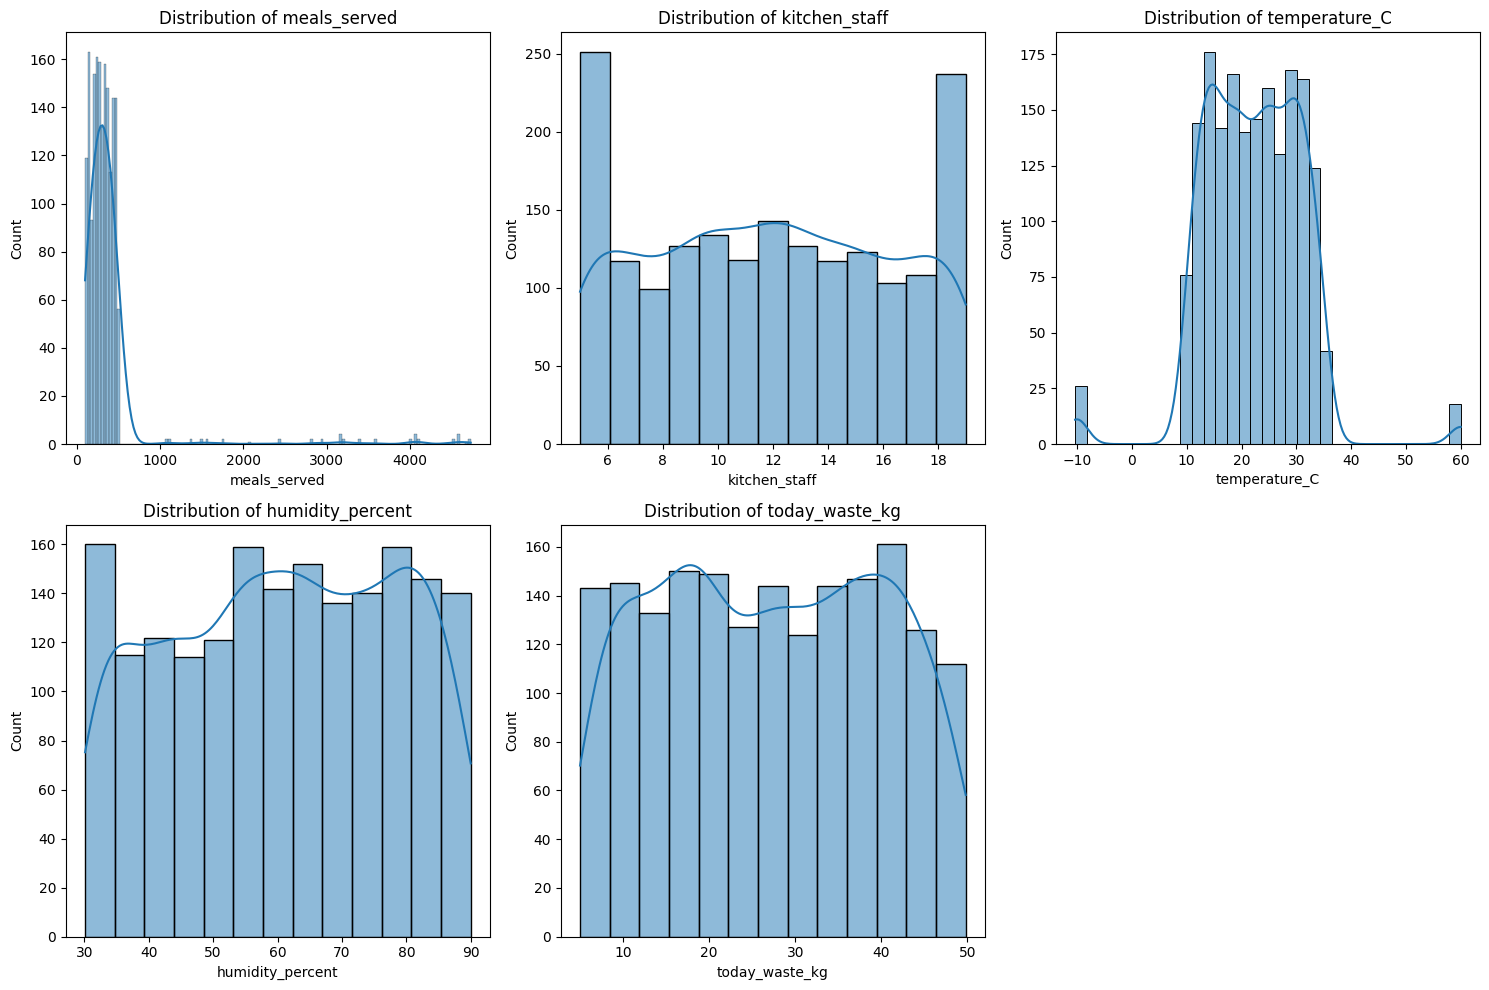

In [381]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis: Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()




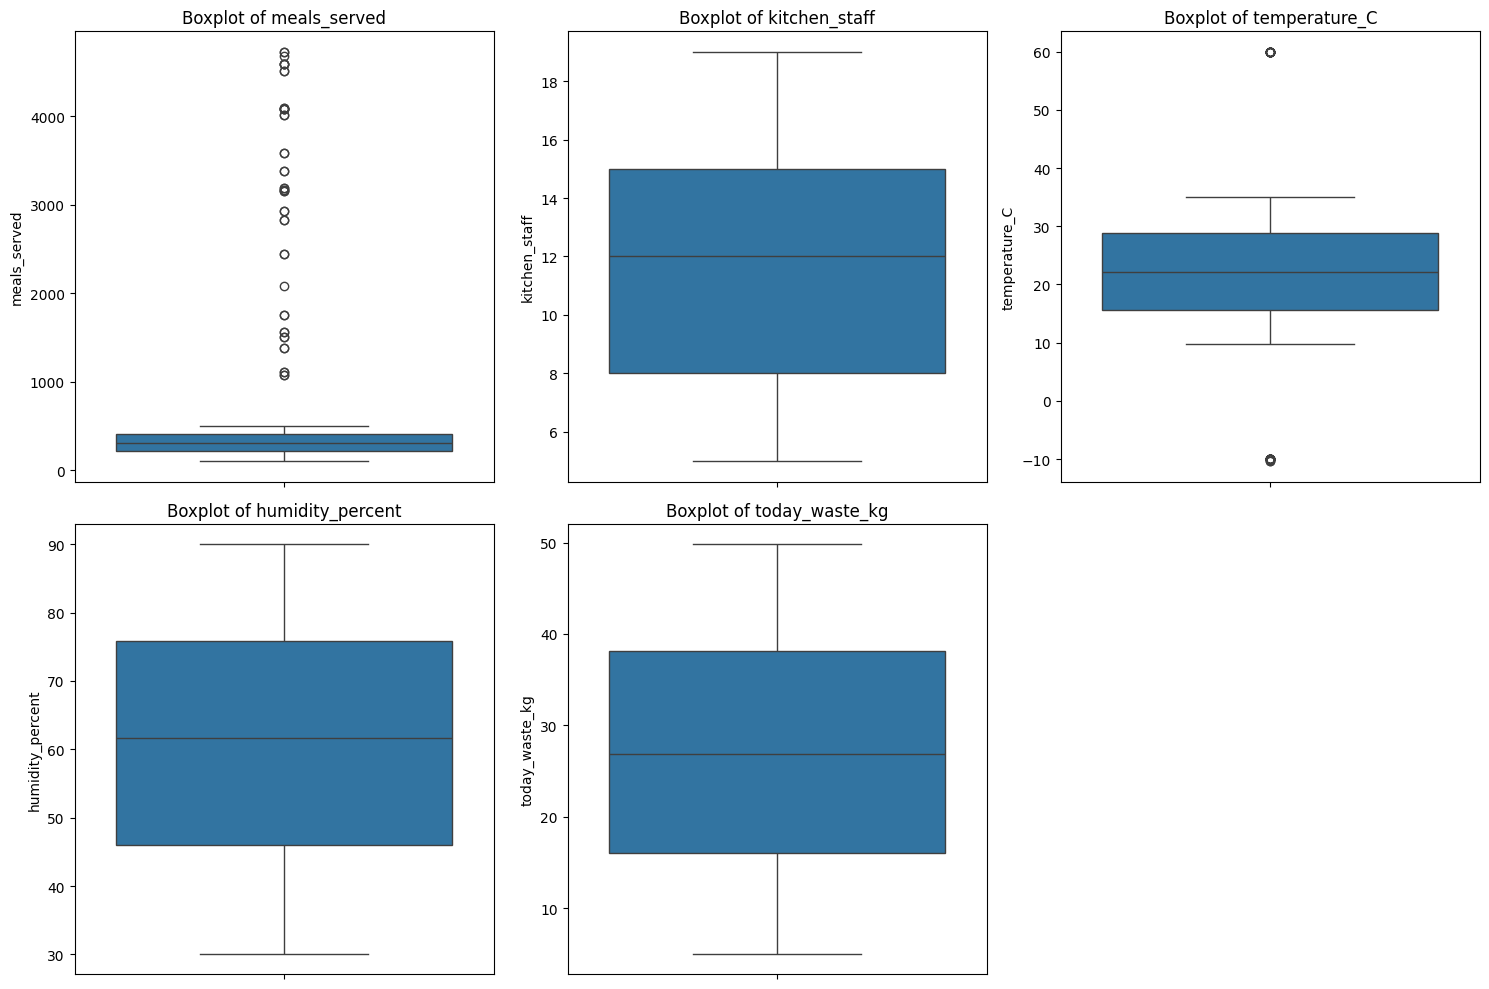

In [382]:
# Univariate Analysis: Boxplots for numerical features to visualize the distribution of the data.
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [383]:
#Set null values of meals_served to its median as it is skewed
df['meals_served'] = df['meals_served'].fillna(df['meals_served'].median())

#Set null values of kitchen_staff to its median as it is skewed (slightly right)
df['kitchen_staff'] = df['kitchen_staff'].fillna(df['kitchen_staff'].median())

#Set null values of humidity_percent to its median as it is skewed (slightly left)
df['humidity_percent'] = df['humidity_percent'].fillna(df['humidity_percent'].median())

#Set null values of today_waste_kg to its mean as it is bionomial
df['today_waste_kg'] = df['today_waste_kg'].fillna(df['today_waste_kg'].mean())

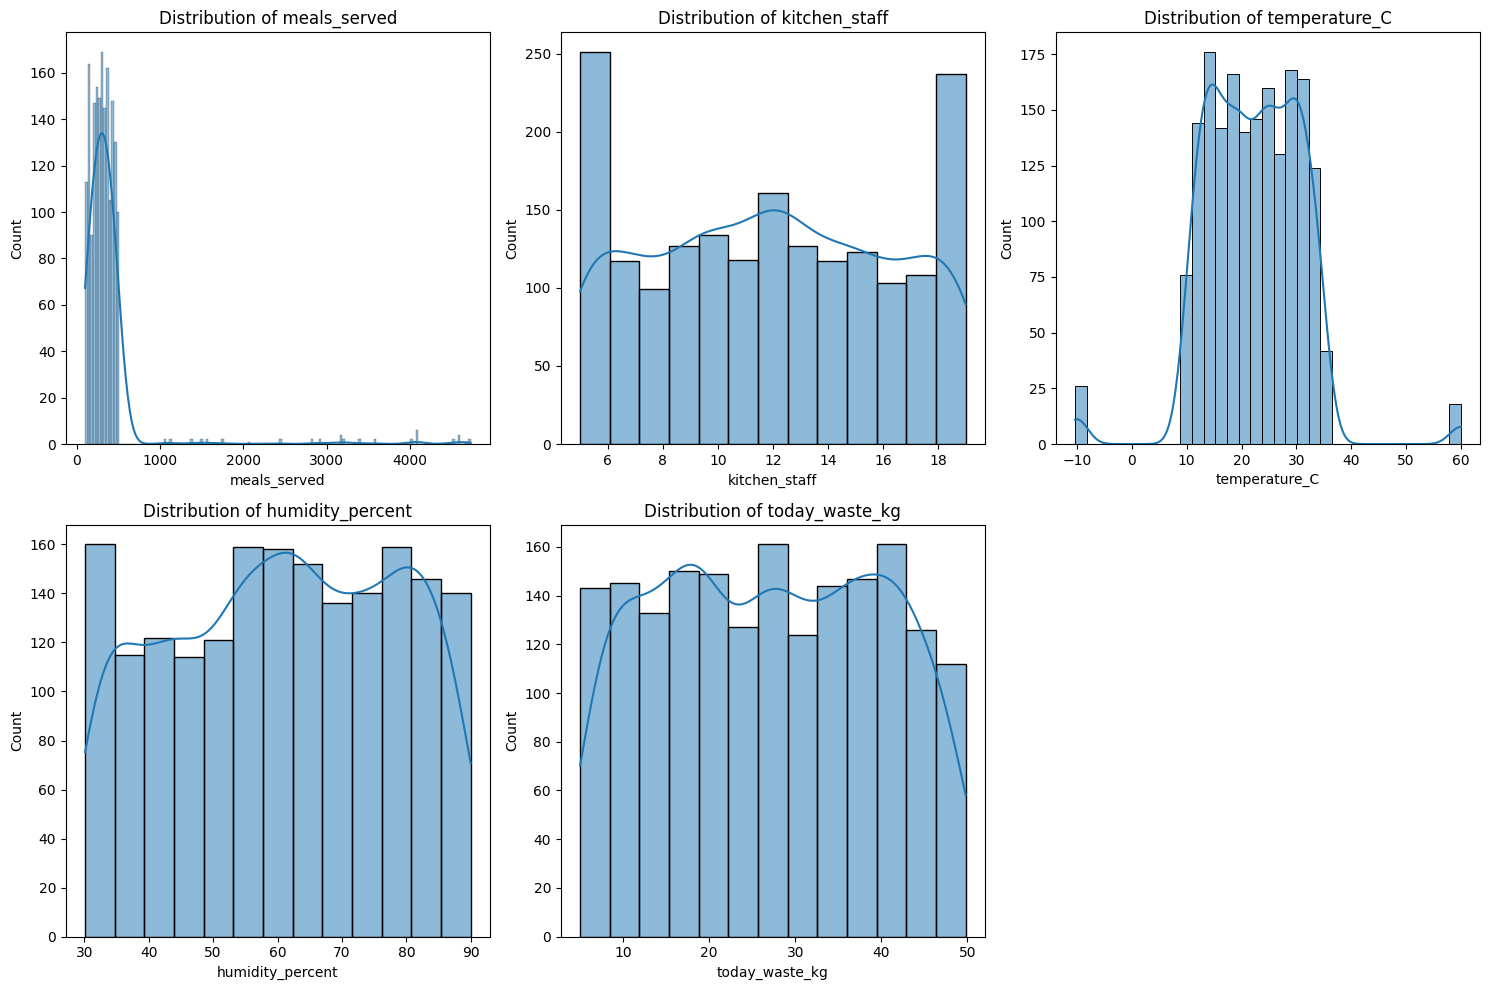

In [384]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()






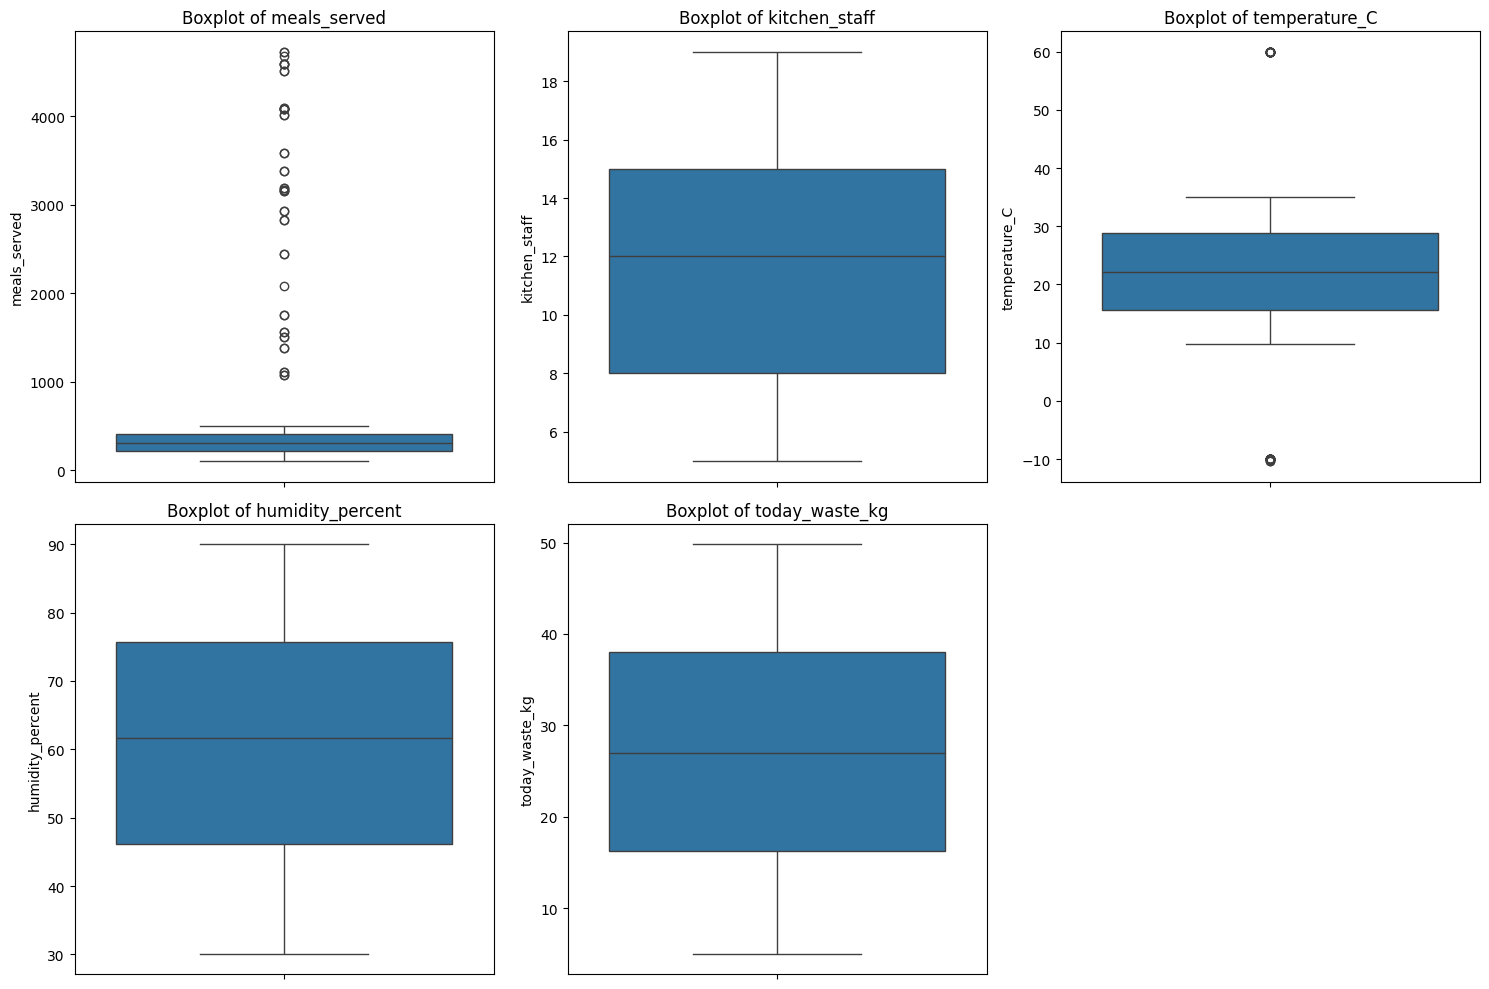

In [385]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [386]:
null_percent =(df.isnull().sum() / len(df)) * 100
null_percent

,0
ID,0.000000
date,0.000000
meals_served,0.000000
kitchen_staff,0.000000
temperature_C,0.000000
humidity_percent,0.000000
day_of_week,0.000000
special_event,0.000000
staff_experience,18.496158
waste_category,1.152580


**Fix Nan values in Catagorical Columns**

In [387]:
categorical_columns=['day_of_week','special_event','staff_experience','waste_category']

df.info()
null_percent =(df.isnull().sum() / len(df)) * 100
null_percent

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1822 non-null   int64         
 1   date              1822 non-null   datetime64[ns]
 2   meals_served      1822 non-null   float64       
 3   kitchen_staff     1822 non-null   float64       
 4   temperature_C     1822 non-null   float64       
 5   humidity_percent  1822 non-null   float64       
 6   day_of_week       1822 non-null   int64         
 7   special_event     1822 non-null   object        
 8   staff_experience  1485 non-null   object        
 9   waste_category    1801 non-null   object        
 10  today_waste_kg    1822 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 156.7+ KB


,0
ID,0.000000
date,0.000000
meals_served,0.000000
kitchen_staff,0.000000
temperature_C,0.000000
humidity_percent,0.000000
day_of_week,0.000000
special_event,0.000000
staff_experience,18.496158
waste_category,1.152580


In [388]:
df['staff_experience'].nunique()

4

In [389]:
df['special_event'] = df['special_event'].astype('int64')

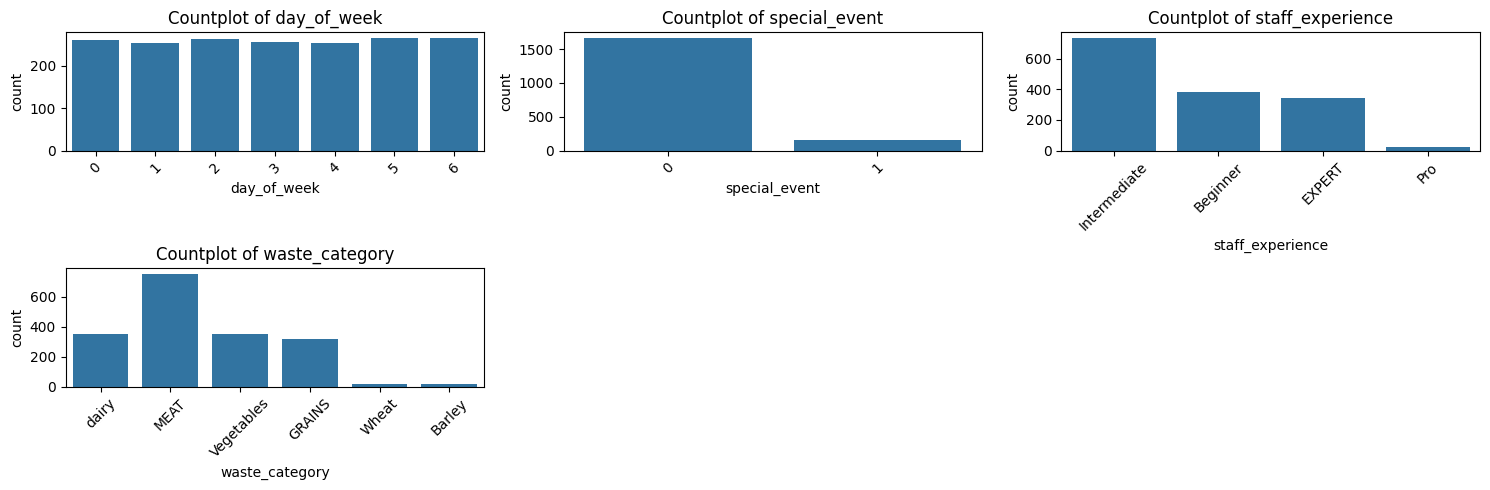

In [390]:

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_columns):
  plt.subplot(2,3,i+1)
  sns.countplot(x=df[col])
  plt.xticks(rotation=45)
  plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

In [391]:
for col in categorical_columns:
    print(f"\n--- Value counts (%): {col} ---")
    percent = df[col].value_counts(normalize=True, dropna=False) * 100
    print(percent.round(2).astype(str) + '%')


--- Value counts (%): day_of_week ---
day_of_week
6     14.6%
5     14.6%
2    14.49%
0    14.38%
3    14.05%
1    13.94%
4    13.94%
Name: proportion, dtype: object

--- Value counts (%): special_event ---
special_event
0    91.44%
1     8.56%
Name: proportion, dtype: object

--- Value counts (%): staff_experience ---
staff_experience
Intermediate    40.29%
Beginner        20.91%
EXPERT          18.99%
NaN              18.5%
Pro              1.32%
Name: proportion, dtype: object

--- Value counts (%): waste_category ---
waste_category
MEAT          41.38%
dairy         19.26%
Vegetables    19.21%
GRAINS         17.4%
NaN            1.15%
Barley         0.82%
Wheat          0.77%
Name: proportion, dtype: object


In [392]:
#Set null values of staff_experience to a new catagari as null values are of high percentage
df['staff_experience'] = df['staff_experience'].fillna('Unknown')
#df['staff_experience'] = df['staff_experience'].fillna(df['staff_experience'].mode()[0])

#Set null values of waste_category to its mode as one catagori has a clear majority
df['waste_category'] = df['waste_category'].fillna(df['waste_category'].mode()[0])

In [393]:
null_percent =(df.isnull().sum() / len(df)) * 100
null_percent

,0
ID,0.0
date,0.0
meals_served,0.0
kitchen_staff,0.0
temperature_C,0.0
humidity_percent,0.0
day_of_week,0.0
special_event,0.0
staff_experience,0.0
waste_category,0.0


**Check for duplicate rows**

In [394]:
df.duplicated().sum()

np.int64(0)

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1822 non-null   int64         
 1   date              1822 non-null   datetime64[ns]
 2   meals_served      1822 non-null   float64       
 3   kitchen_staff     1822 non-null   float64       
 4   temperature_C     1822 non-null   float64       
 5   humidity_percent  1822 non-null   float64       
 6   day_of_week       1822 non-null   int64         
 7   special_event     1822 non-null   int64         
 8   staff_experience  1822 non-null   object        
 9   waste_category    1822 non-null   object        
 10  today_waste_kg    1822 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 156.7+ KB


In [396]:
df = df.sort_values(by='date')
df

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,staff_experience,waste_category,today_waste_kg
341,341,2022-01-01,202.0,9.0,31.976787,66.826645,5,0,Intermediate,MEAT,40.833530
364,364,2022-01-01,202.0,9.0,32.318759,66.826645,5,0,Intermediate,MEAT,10.098482
1252,1252,2022-01-01,202.0,9.0,31.976787,66.826645,5,0,Intermediate,MEAT,40.833530
1275,1275,2022-01-01,202.0,9.0,32.318759,66.826645,5,0,Intermediate,MEAT,10.098482
1082,1082,2022-01-02,448.0,16.0,10.092464,56.130327,6,0,Intermediate,GRAINS,12.639164
...,...,...,...,...,...,...,...,...,...,...,...
411,411,2024-09-24,114.0,14.0,32.633997,77.039242,1,0,Beginner,Vegetables,19.278746
1449,1449,2024-09-25,291.0,13.0,28.491783,55.163377,2,0,EXPERT,Vegetables,19.360557
538,538,2024-09-25,291.0,13.0,28.491783,55.163377,2,0,EXPERT,Vegetables,19.360557
1647,1647,2024-09-26,218.0,7.0,14.781510,60.004807,3,0,Intermediate,MEAT,45.780508


In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1822 entries, 341 to 736
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1822 non-null   int64         
 1   date              1822 non-null   datetime64[ns]
 2   meals_served      1822 non-null   float64       
 3   kitchen_staff     1822 non-null   float64       
 4   temperature_C     1822 non-null   float64       
 5   humidity_percent  1822 non-null   float64       
 6   day_of_week       1822 non-null   int64         
 7   special_event     1822 non-null   int64         
 8   staff_experience  1822 non-null   object        
 9   waste_category    1822 non-null   object        
 10  today_waste_kg    1822 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 170.8+ KB


In [398]:
df.duplicated().sum()

np.int64(0)

In [399]:
df = df.drop(columns=['ID'])

In [400]:
(df.duplicated().sum()/len(df)) *100

np.float64(42.26125137211855)

In [401]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,staff_experience,waste_category,today_waste_kg
341,2022-01-01,202.0,9.0,31.976787,66.826645,5,0,Intermediate,MEAT,40.833530
364,2022-01-01,202.0,9.0,32.318759,66.826645,5,0,Intermediate,MEAT,10.098482
1252,2022-01-01,202.0,9.0,31.976787,66.826645,5,0,Intermediate,MEAT,40.833530
1275,2022-01-01,202.0,9.0,32.318759,66.826645,5,0,Intermediate,MEAT,10.098482
1082,2022-01-02,448.0,16.0,10.092464,56.130327,6,0,Intermediate,GRAINS,12.639164
...,...,...,...,...,...,...,...,...,...,...
411,2024-09-24,114.0,14.0,32.633997,77.039242,1,0,Beginner,Vegetables,19.278746
1449,2024-09-25,291.0,13.0,28.491783,55.163377,2,0,EXPERT,Vegetables,19.360557
538,2024-09-25,291.0,13.0,28.491783,55.163377,2,0,EXPERT,Vegetables,19.360557
1647,2024-09-26,218.0,7.0,14.781510,60.004807,3,0,Intermediate,MEAT,45.780508


In [402]:
#Remove duplicate rows as we still have date as unique identifier
df.drop_duplicates(inplace=True)


# Exploratory Data Analysis (EDA)

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 341 to 1647
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1052 non-null   datetime64[ns]
 1   meals_served      1052 non-null   float64       
 2   kitchen_staff     1052 non-null   float64       
 3   temperature_C     1052 non-null   float64       
 4   humidity_percent  1052 non-null   float64       
 5   day_of_week       1052 non-null   int64         
 6   special_event     1052 non-null   int64         
 7   staff_experience  1052 non-null   object        
 8   waste_category    1052 non-null   object        
 9   today_waste_kg    1052 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 90.4+ KB


In [404]:

for col in continuous_columns:
    print(f"\nSummary of {col}:")
    print("median",df[col].median())
    print(df[col].describe())

for col in categorical_columns:
    print(f"\nSummary of {col}:")
    if (df[col].dtype in ['int64', 'float64']):
      print("median",df[col].median())
    print("mode",df[col].mode())



Summary of meals_served:
median 306.0
count    1052.000000
mean      367.291825
std       471.894616
min       100.000000
25%       212.750000
50%       306.000000
75%       406.000000
max      4730.000000
Name: meals_served, dtype: float64

Summary of kitchen_staff:
median 12.0
count    1052.000000
mean       11.929658
std         4.285349
min         5.000000
25%         8.000000
50%        12.000000
75%        15.000000
max        19.000000
Name: kitchen_staff, dtype: float64

Summary of temperature_C:
median 21.97958074
count    1052.000000
mean       22.015762
std         8.924321
min       -10.372207
25%        15.638526
50%        21.979581
75%        28.680490
max        60.000000
Name: temperature_C, dtype: float64

Summary of humidity_percent:
median 61.63493525
count    1052.000000
mean       60.852891
std        17.152147
min        30.121111
25%        46.250031
50%        61.634935
75%        75.714409
max        89.982828
Name: humidity_percent, dtype: float64

Summary 

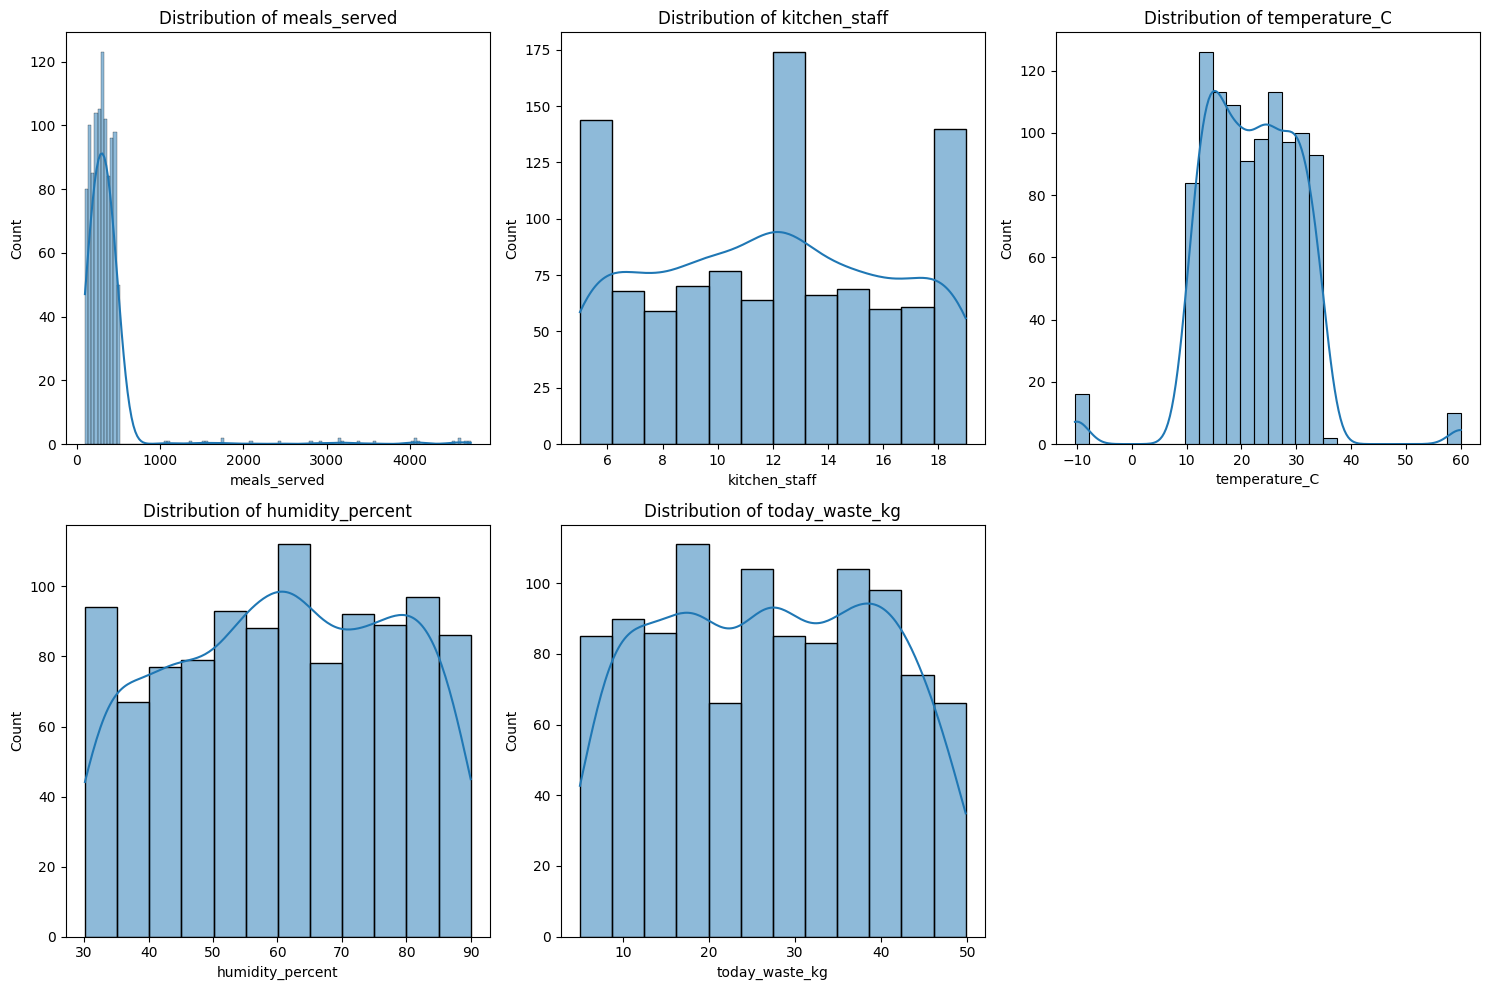

In [405]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()




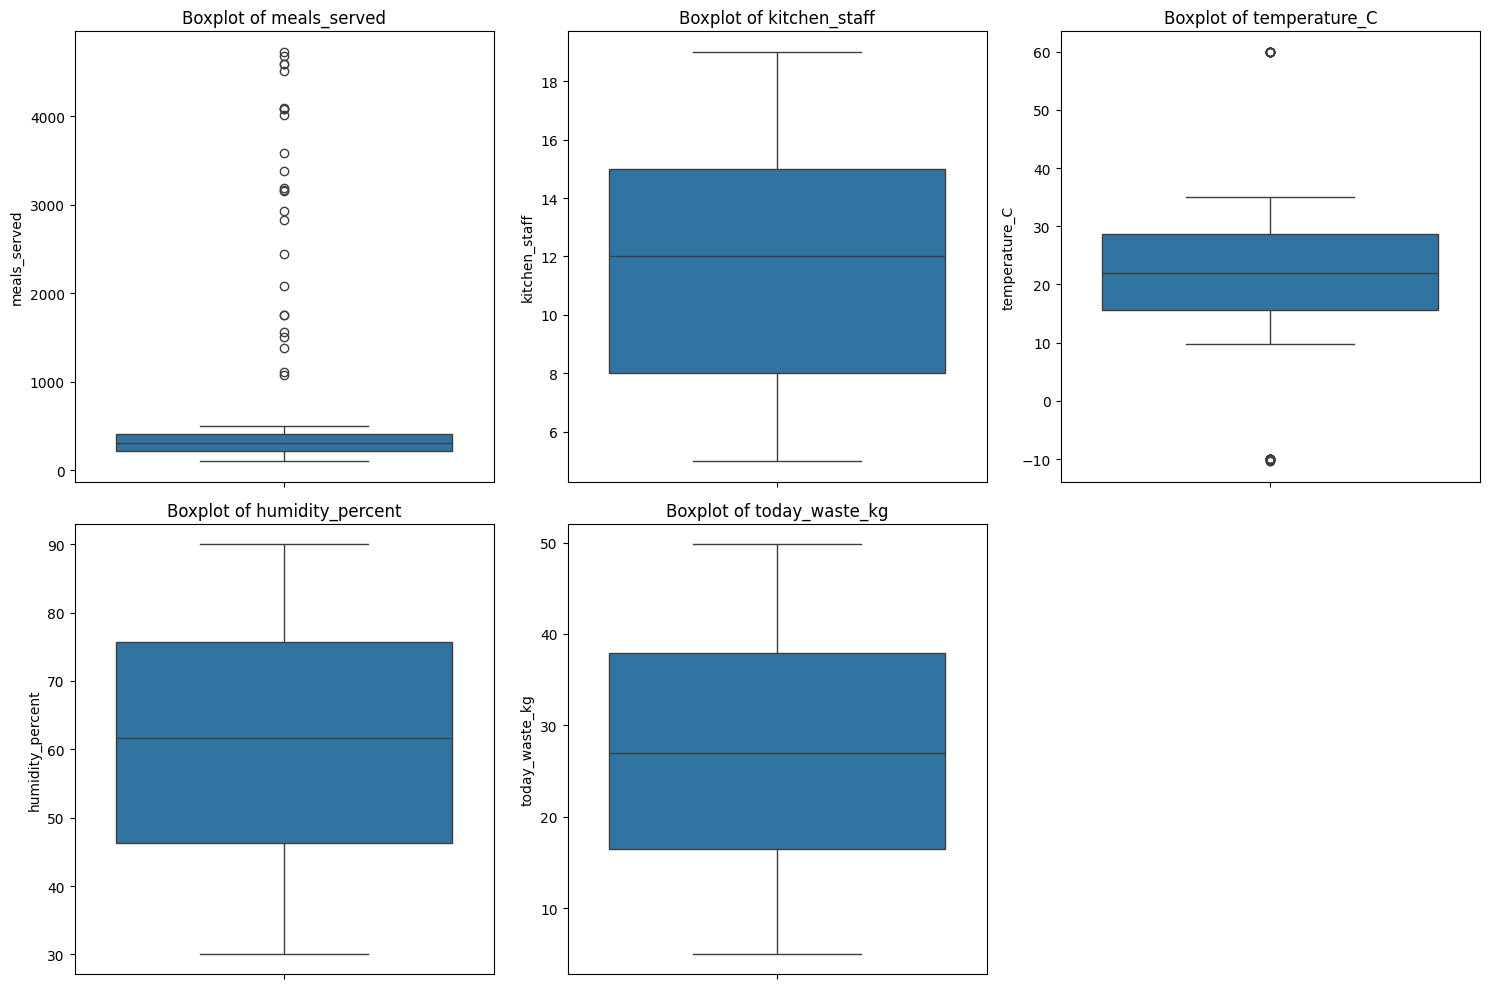

In [406]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


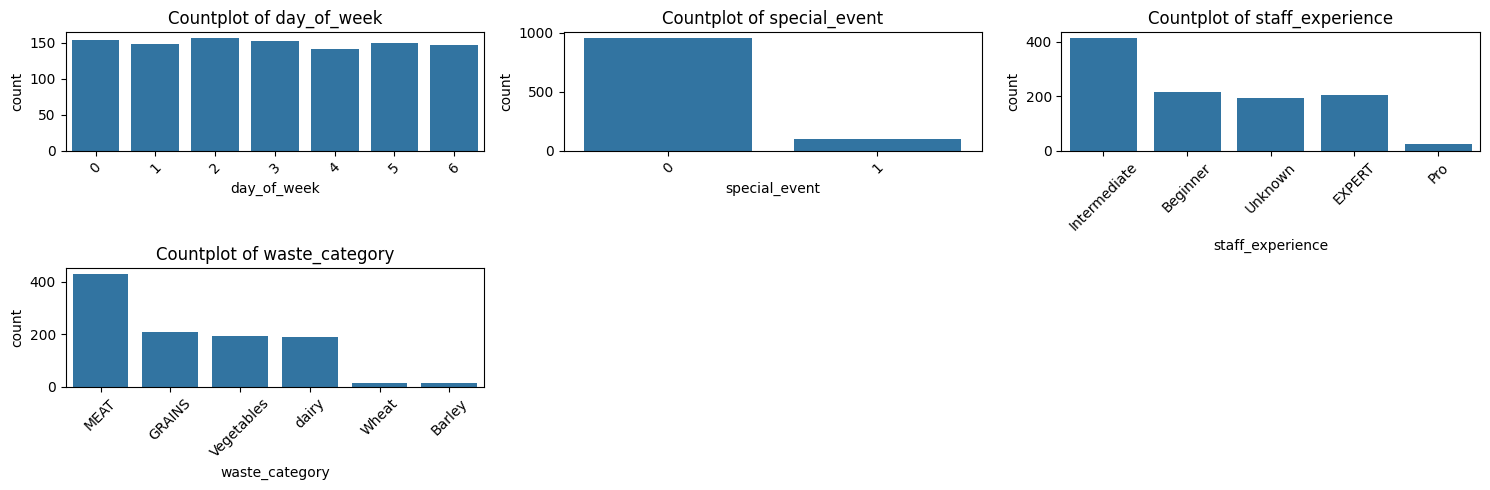

In [407]:

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_columns):
  plt.subplot(2,3,i+1)
  sns.countplot(x=df[col])
  plt.xticks(rotation=45)
  plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

There are outliers in measl_served and temperature_C
will keep these outliers cause meals_served are higher on special_events,and its a true fact , similarly temperatue is a natural fenomina

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 341 to 1647
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1052 non-null   datetime64[ns]
 1   meals_served      1052 non-null   float64       
 2   kitchen_staff     1052 non-null   float64       
 3   temperature_C     1052 non-null   float64       
 4   humidity_percent  1052 non-null   float64       
 5   day_of_week       1052 non-null   int64         
 6   special_event     1052 non-null   int64         
 7   staff_experience  1052 non-null   object        
 8   waste_category    1052 non-null   object        
 9   today_waste_kg    1052 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 90.4+ KB


In [409]:
df.dropna()

,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,staff_experience,waste_category,today_waste_kg
341,2022-01-01,202.0,9.0,31.976787,66.826645,5,0,Intermediate,MEAT,40.833530
364,2022-01-01,202.0,9.0,32.318759,66.826645,5,0,Intermediate,MEAT,10.098482
1082,2022-01-02,448.0,16.0,10.092464,56.130327,6,0,Intermediate,GRAINS,12.639164
849,2022-01-02,448.0,16.0,10.128629,56.130327,6,0,Intermediate,GRAINS,29.797293
1567,2022-01-03,370.0,14.0,30.759733,64.634984,0,0,Beginner,Vegetables,10.359794
...,...,...,...,...,...,...,...,...,...,...
1165,2024-09-21,393.0,9.0,12.179487,59.965906,5,0,Beginner,MEAT,46.878911
1328,2024-09-22,326.0,15.0,27.976936,62.101530,6,0,Unknown,MEAT,48.342156
1322,2024-09-24,114.0,14.0,32.633997,77.039242,1,0,Beginner,Vegetables,19.278746
1449,2024-09-25,291.0,13.0,28.491783,55.163377,2,0,EXPERT,Vegetables,19.360557


Through box plots, it can be seen that food wastage decreases with more experienced staff, and the mean allows us to easily assess this. Additionally, food wastage is higher on special events compared to usual days.


And the item

In [410]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()

# # Apply label encoding to the 'color' column
# df['staff_experience'] = label_encoder.fit_transform(df['staff_experience'])

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 341 to 1647
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1052 non-null   datetime64[ns]
 1   meals_served      1052 non-null   float64       
 2   kitchen_staff     1052 non-null   float64       
 3   temperature_C     1052 non-null   float64       
 4   humidity_percent  1052 non-null   float64       
 5   day_of_week       1052 non-null   int64         
 6   special_event     1052 non-null   int64         
 7   staff_experience  1052 non-null   object        
 8   waste_category    1052 non-null   object        
 9   today_waste_kg    1052 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 90.4+ KB


In [412]:
df['staff_experience'].nunique()

5

In [413]:
df['staff_experience'].value_counts()

,count
staff_experience,
Intermediate,414
Beginner,214
EXPERT,206
Unknown,195
Pro,23


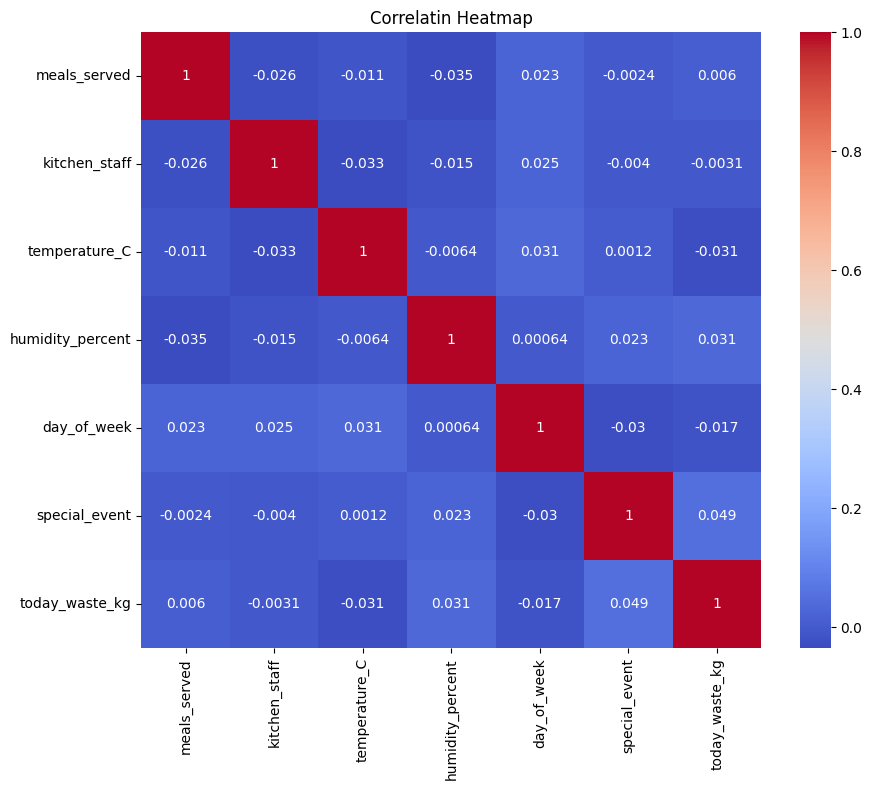

In [443]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlatin Heatmap')
plt.show()

In heat map it can be seen that food wastage is not highly corealated with any other vairable


In [415]:
df


,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,staff_experience,waste_category,today_waste_kg
341,2022-01-01,202.0,9.0,31.976787,66.826645,5,0,Intermediate,MEAT,40.833530
364,2022-01-01,202.0,9.0,32.318759,66.826645,5,0,Intermediate,MEAT,10.098482
1082,2022-01-02,448.0,16.0,10.092464,56.130327,6,0,Intermediate,GRAINS,12.639164
849,2022-01-02,448.0,16.0,10.128629,56.130327,6,0,Intermediate,GRAINS,29.797293
1567,2022-01-03,370.0,14.0,30.759733,64.634984,0,0,Beginner,Vegetables,10.359794
...,...,...,...,...,...,...,...,...,...,...
1165,2024-09-21,393.0,9.0,12.179487,59.965906,5,0,Beginner,MEAT,46.878911
1328,2024-09-22,326.0,15.0,27.976936,62.101530,6,0,Unknown,MEAT,48.342156
1322,2024-09-24,114.0,14.0,32.633997,77.039242,1,0,Beginner,Vegetables,19.278746
1449,2024-09-25,291.0,13.0,28.491783,55.163377,2,0,EXPERT,Vegetables,19.360557


# 3. Hypothesis Testing

3.1. Impact of Kitchen Staff on Food Waste

1. Null hypothesis (H0): There is no relationship between the number of kitchen
staff and food waste.
2. Alternative hypothesis (H1): The number of kitchen staff significantly affects food waste.

In [416]:
df['kitchen_staff'].describe()

,kitchen_staff
count,1052.000000
mean,11.929658
std,4.285349
min,5.000000
25%,8.000000
50%,12.000000
75%,15.000000
max,19.000000


In [417]:
# Bin the 'value' column
staff_bins = [5, 10, 15,20]
labels = ['Low', 'Medium', 'High']
df['staff_bin'] = pd.cut(df['kitchen_staff'], bins=staff_bins, labels=labels)
df

,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,staff_experience,waste_category,today_waste_kg,staff_bin
341,2022-01-01,202.0,9.0,31.976787,66.826645,5,0,Intermediate,MEAT,40.833530,Low
364,2022-01-01,202.0,9.0,32.318759,66.826645,5,0,Intermediate,MEAT,10.098482,Low
1082,2022-01-02,448.0,16.0,10.092464,56.130327,6,0,Intermediate,GRAINS,12.639164,High
849,2022-01-02,448.0,16.0,10.128629,56.130327,6,0,Intermediate,GRAINS,29.797293,High
1567,2022-01-03,370.0,14.0,30.759733,64.634984,0,0,Beginner,Vegetables,10.359794,Medium
...,...,...,...,...,...,...,...,...,...,...,...
1165,2024-09-21,393.0,9.0,12.179487,59.965906,5,0,Beginner,MEAT,46.878911,Low
1328,2024-09-22,326.0,15.0,27.976936,62.101530,6,0,Unknown,MEAT,48.342156,Medium
1322,2024-09-24,114.0,14.0,32.633997,77.039242,1,0,Beginner,Vegetables,19.278746,Medium
1449,2024-09-25,291.0,13.0,28.491783,55.163377,2,0,EXPERT,Vegetables,19.360557,Medium


<ipython-input-418-b669b26c57ff>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby('staff_bin')['today_waste_kg'].mean().reset_index()


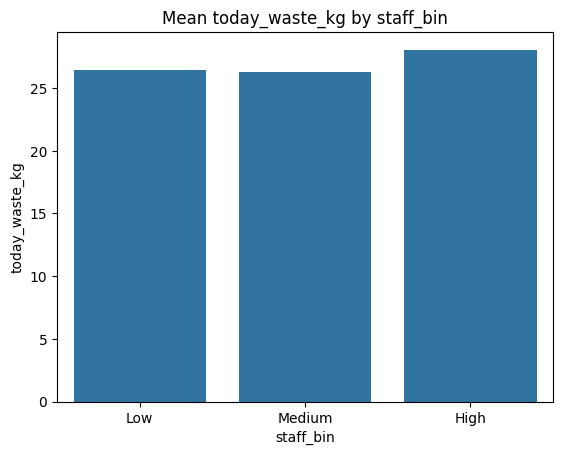

In [418]:
# Bar plot
df_grouped = df.groupby('staff_bin')['today_waste_kg'].mean().reset_index()
sns.barplot(x='staff_bin', y='today_waste_kg', data=df_grouped)
plt.title('Mean today_waste_kg by staff_bin')
plt.show()



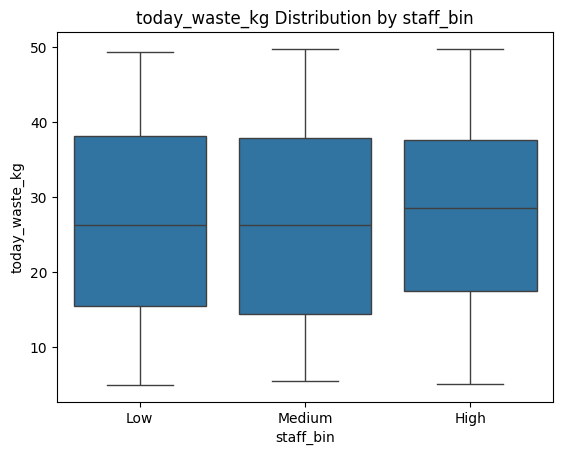

In [419]:
# Box plot
sns.boxplot(x='staff_bin', y='today_waste_kg', data=df)
plt.title('today_waste_kg Distribution by staff_bin')
plt.show()

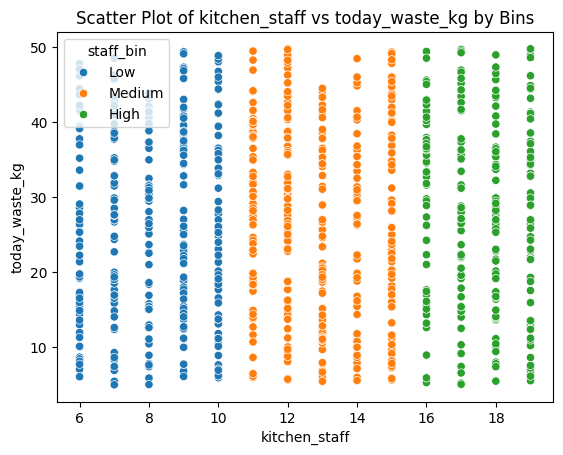

In [420]:


# Scatter plot
sns.scatterplot(x='kitchen_staff', y='today_waste_kg', hue='staff_bin', data=df)
plt.title('Scatter Plot of kitchen_staff vs today_waste_kg by Bins')
plt.show()

In [445]:
from scipy.stats import f_oneway
low = df[df['staff_bin'] == 'Low']['today_waste_kg']
medium = df[df['staff_bin'] == 'Medium']['today_waste_kg']
high = df[df['staff_bin'] == 'High']['today_waste_kg']

f_stat, p_value = f_oneway(low, medium, high)
print(f"F-statistic: {f_stat:.3f}, P-value: {p_value:.3f}")

F-statistic: 1.765, P-value: 0.172


So following Hypothesis is true:
2. Alternative hypothesis (H1): The number of kitchen staff significantly affects food waste.

3.2. Special Events and Food Waste



1. Null hypothesis (H0): There is no dierence in food waste between special event days and non-special event days.
2. Alternative hypothesis (H1): Food waste is higher on special event days.


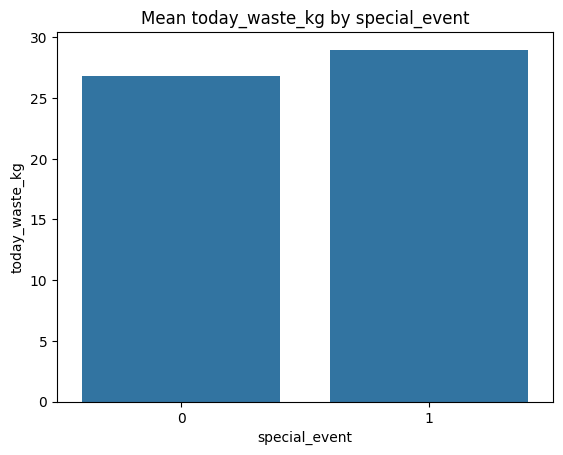

In [421]:
# Bar plot
df_grouped = df.groupby('special_event')['today_waste_kg'].mean().reset_index()
sns.barplot(x='special_event', y='today_waste_kg', data=df_grouped)
plt.title('Mean today_waste_kg by special_event')
plt.show()


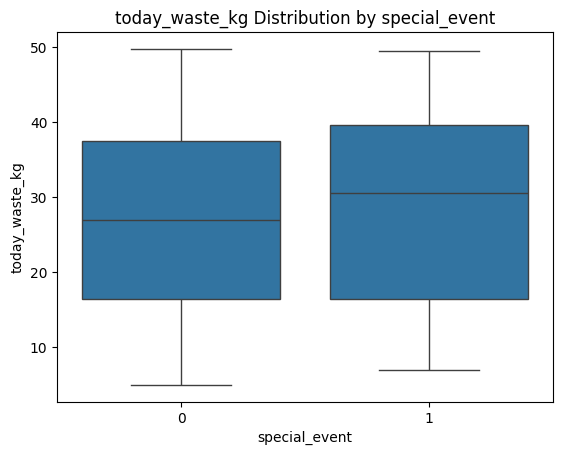

In [422]:

# Box plot
sns.boxplot(x='special_event', y='today_waste_kg', data=df)
plt.title('today_waste_kg Distribution by special_event')
plt.show()



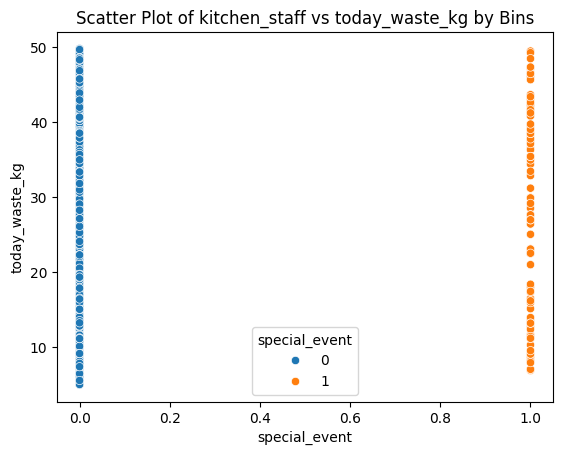

In [423]:
# Scatter plot
sns.scatterplot(x='special_event', y='today_waste_kg', hue='special_event', data=df)
plt.title('Scatter Plot of special_event vs today_waste_kg by Bins')
plt.show()

In [446]:
from scipy.stats import ttest_ind

# Split food_wastage by specialEvent status
event = df[df['special_event'] == 1]['today_waste_kg']
no_event = df[df['special_event'] == 0]['today_waste_kg']

# Perform t-test (Welch’s t-test is safer in most cases)
t_stat, p_value = ttest_ind(event, no_event, equal_var=False)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

T-statistic: 1.554, P-value: 0.123


So by seeing these plots it can be seen that food wastage was higher on avaerage when there is a specail event

So following Hypothesis is true:
2. Alternative hypothesis (H1): Food waste is higher on special event days.

# 4. Key Insights and Recommendations

Staff Optimization:

<ipython-input-424-fc2ecdb3a378>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby('staff_bin')['today_waste_kg'].mean().reset_index()


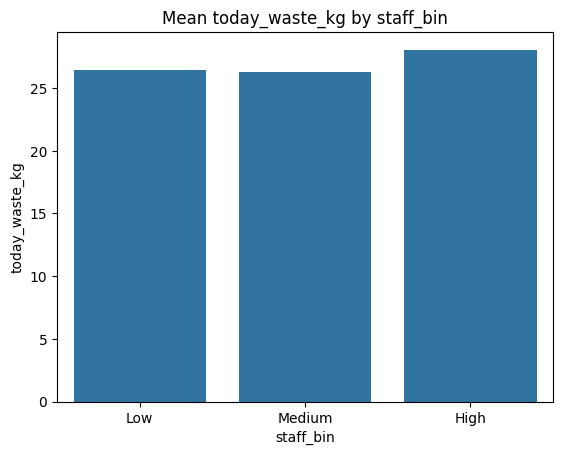

In [424]:
# Bar plot
df_grouped = df.groupby('staff_bin')['today_waste_kg'].mean().reset_index()
sns.barplot(x='staff_bin', y='today_waste_kg', data=df_grouped)
plt.title('Mean today_waste_kg by staff_bin')
plt.show()


There is a positive corealtion between staff number and food waste , so to reduce food waste satff number should be kept in low and medium bins which is from 5 to 15 staff numbers

Environmental Factors: If temperature or humidity affects food waste, recommend strategies to adjust food preparation based on weather conditions.

In [425]:
df['temperature_C'].nunique()

892

In [426]:
df['temperature_C'].describe()

,temperature_C
count,1052.000000
mean,22.015762
std,8.924321
min,-10.372207
25%,15.638526
50%,21.979581
75%,28.680490
max,60.000000


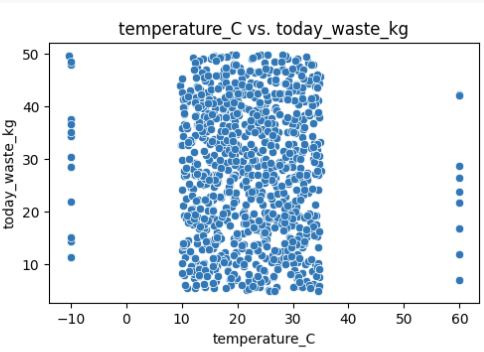

In [427]:
# Bin the 'value' column
temp_bins = [10, 20, 30, 40]
labels = ['Low', 'Medium', 'High']
df['temperature_bin'] = pd.cut(df['temperature_C'], bins=temp_bins, labels=labels)
df

,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,staff_experience,waste_category,today_waste_kg,staff_bin,temperature_bin
341,2022-01-01,202.0,9.0,31.976787,66.826645,5,0,Intermediate,MEAT,40.833530,Low,High
364,2022-01-01,202.0,9.0,32.318759,66.826645,5,0,Intermediate,MEAT,10.098482,Low,High
1082,2022-01-02,448.0,16.0,10.092464,56.130327,6,0,Intermediate,GRAINS,12.639164,High,Low
849,2022-01-02,448.0,16.0,10.128629,56.130327,6,0,Intermediate,GRAINS,29.797293,High,Low
1567,2022-01-03,370.0,14.0,30.759733,64.634984,0,0,Beginner,Vegetables,10.359794,Medium,High
...,...,...,...,...,...,...,...,...,...,...,...,...
1165,2024-09-21,393.0,9.0,12.179487,59.965906,5,0,Beginner,MEAT,46.878911,Low,Low
1328,2024-09-22,326.0,15.0,27.976936,62.101530,6,0,Unknown,MEAT,48.342156,Medium,Medium
1322,2024-09-24,114.0,14.0,32.633997,77.039242,1,0,Beginner,Vegetables,19.278746,Medium,High
1449,2024-09-25,291.0,13.0,28.491783,55.163377,2,0,EXPERT,Vegetables,19.360557,Medium,Medium


<ipython-input-428-bf16ebaf8329>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_temperature = df.groupby('temperature_bin')['today_waste_kg'].mean().reset_index()


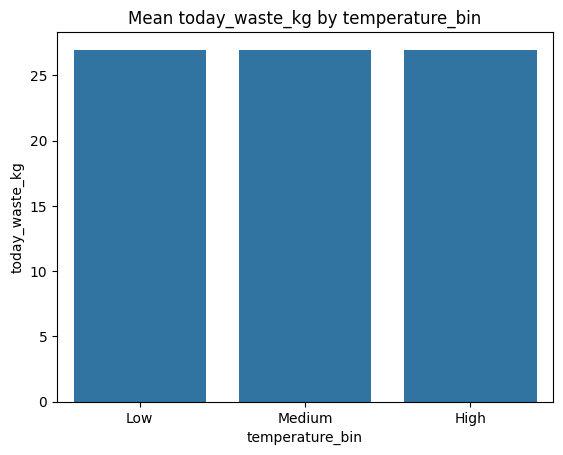

In [428]:
# Bar plot
df_grouped_temperature = df.groupby('temperature_bin')['today_waste_kg'].mean().reset_index()
sns.barplot(x='temperature_bin', y='today_waste_kg', data=df_grouped_temperature)
plt.title('Mean today_waste_kg by temperature_bin')
plt.show()


In [429]:
df['humidity_percent'].nunique()

868

In [430]:
df['humidity_percent'].describe()

,humidity_percent
count,1052.000000
mean,60.852891
std,17.152147
min,30.121111
25%,46.250031
50%,61.634935
75%,75.714409
max,89.982828


In [431]:
# Bin the 'value' column
humidity_bins = [30, 50, 70, 90]
labels = ['Low', 'Medium', 'High']
df['humidity_bin'] = pd.cut(df['humidity_percent'], bins=humidity_bins, labels=labels)
df

,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,staff_experience,waste_category,today_waste_kg,staff_bin,temperature_bin,humidity_bin
341,2022-01-01,202.0,9.0,31.976787,66.826645,5,0,Intermediate,MEAT,40.833530,Low,High,Medium
364,2022-01-01,202.0,9.0,32.318759,66.826645,5,0,Intermediate,MEAT,10.098482,Low,High,Medium
1082,2022-01-02,448.0,16.0,10.092464,56.130327,6,0,Intermediate,GRAINS,12.639164,High,Low,Medium
849,2022-01-02,448.0,16.0,10.128629,56.130327,6,0,Intermediate,GRAINS,29.797293,High,Low,Medium
1567,2022-01-03,370.0,14.0,30.759733,64.634984,0,0,Beginner,Vegetables,10.359794,Medium,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,2024-09-21,393.0,9.0,12.179487,59.965906,5,0,Beginner,MEAT,46.878911,Low,Low,Medium
1328,2024-09-22,326.0,15.0,27.976936,62.101530,6,0,Unknown,MEAT,48.342156,Medium,Medium,Medium
1322,2024-09-24,114.0,14.0,32.633997,77.039242,1,0,Beginner,Vegetables,19.278746,Medium,High,High
1449,2024-09-25,291.0,13.0,28.491783,55.163377,2,0,EXPERT,Vegetables,19.360557,Medium,Medium,Medium


<ipython-input-432-3ed958348db5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_humidity = df.groupby('humidity_bin')['today_waste_kg'].mean().reset_index()


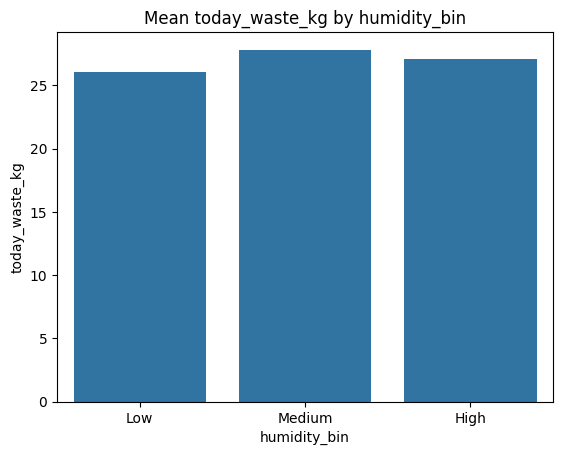

In [432]:
# Bar plot
df_grouped_humidity = df.groupby('humidity_bin')['today_waste_kg'].mean().reset_index()
sns.barplot(x='humidity_bin', y='today_waste_kg', data=df_grouped_humidity)
plt.title('Mean today_waste_kg by humidity_bin')
plt.show()


There is significantly no major relationship between temperature and food or humidity and food.

Event Management:

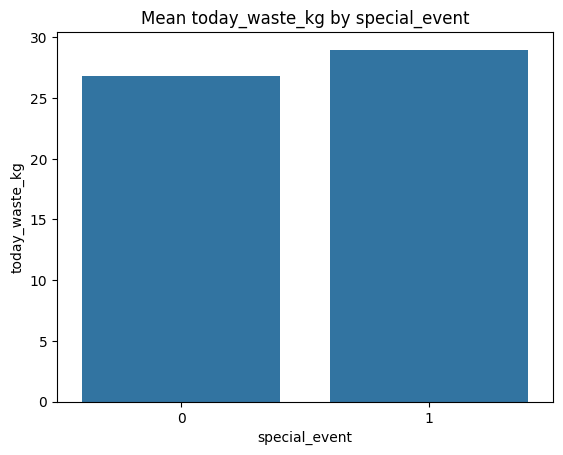

In [433]:
# Bar plot
df_grouped = df.groupby('special_event')['today_waste_kg'].mean().reset_index()
sns.barplot(x='special_event', y='today_waste_kg', data=df_grouped)
plt.title('Mean today_waste_kg by special_event')
plt.show()




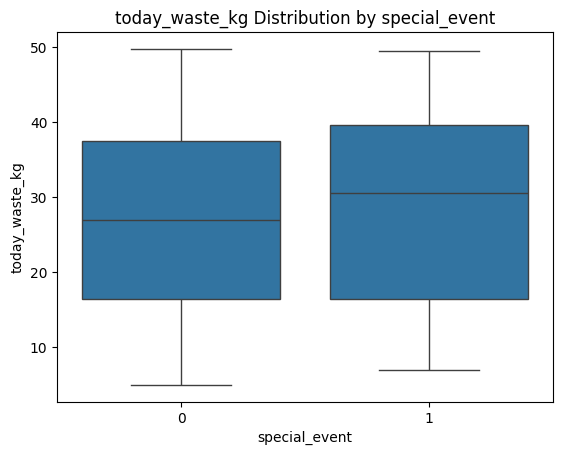

In [434]:
# Box plot
sns.boxplot(x='special_event', y='today_waste_kg', data=df)
plt.title('today_waste_kg Distribution by special_event')
plt.show()



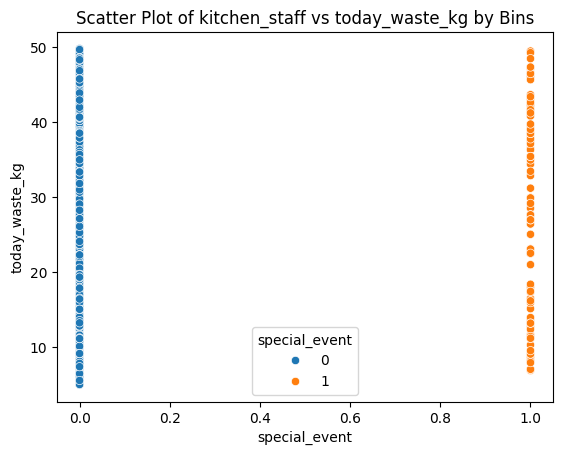

In [435]:
# Scatter plot
sns.scatterplot(x='special_event', y='today_waste_kg', hue='special_event', data=df)
plt.title('Scatter Plot of kitchen_staff vs today_waste_kg by Bins')
plt.show()

In [436]:
grouped = df.groupby(['staff_experience', 'special_event'])['today_waste_kg'].mean()

grouped

staff_experience  special_event
Beginner          0                26.173439
                  1                31.177728
EXPERT            0                26.261432
                  1                25.154482
Intermediate      0                27.862962
                  1                29.708572
Pro               0                24.741925
                  1                22.792995
Unknown           0                26.162838
                  1                32.552924
Name: today_waste_kg, dtype: float64

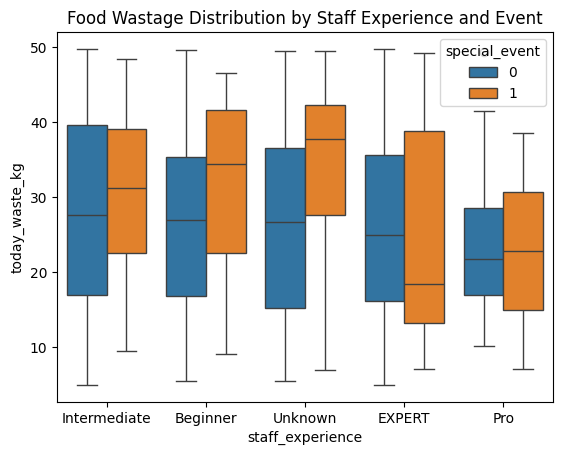

In [437]:
sns.boxplot(
    x='staff_experience',
    y='today_waste_kg',
    hue='special_event',
    data=df
)
plt.title('Food Wastage Distribution by Staff Experience and Event')
plt.show()

So by seeing these plots it can be seen that food wastage was lower on avaerage when the staff was more experienced.



So to avoid food wastage on special event a good pre planning is required and on those days the staff should be of pro or an expert , but to be protective choose pro as in graph above it can be seen that pro staff members max food waste is very lower than max food waste of expert staff members but if you want to take a little bit risk you can choose experts for special events as thier average food waste is lower than pros.


# 5. Data Visualization and Reporting


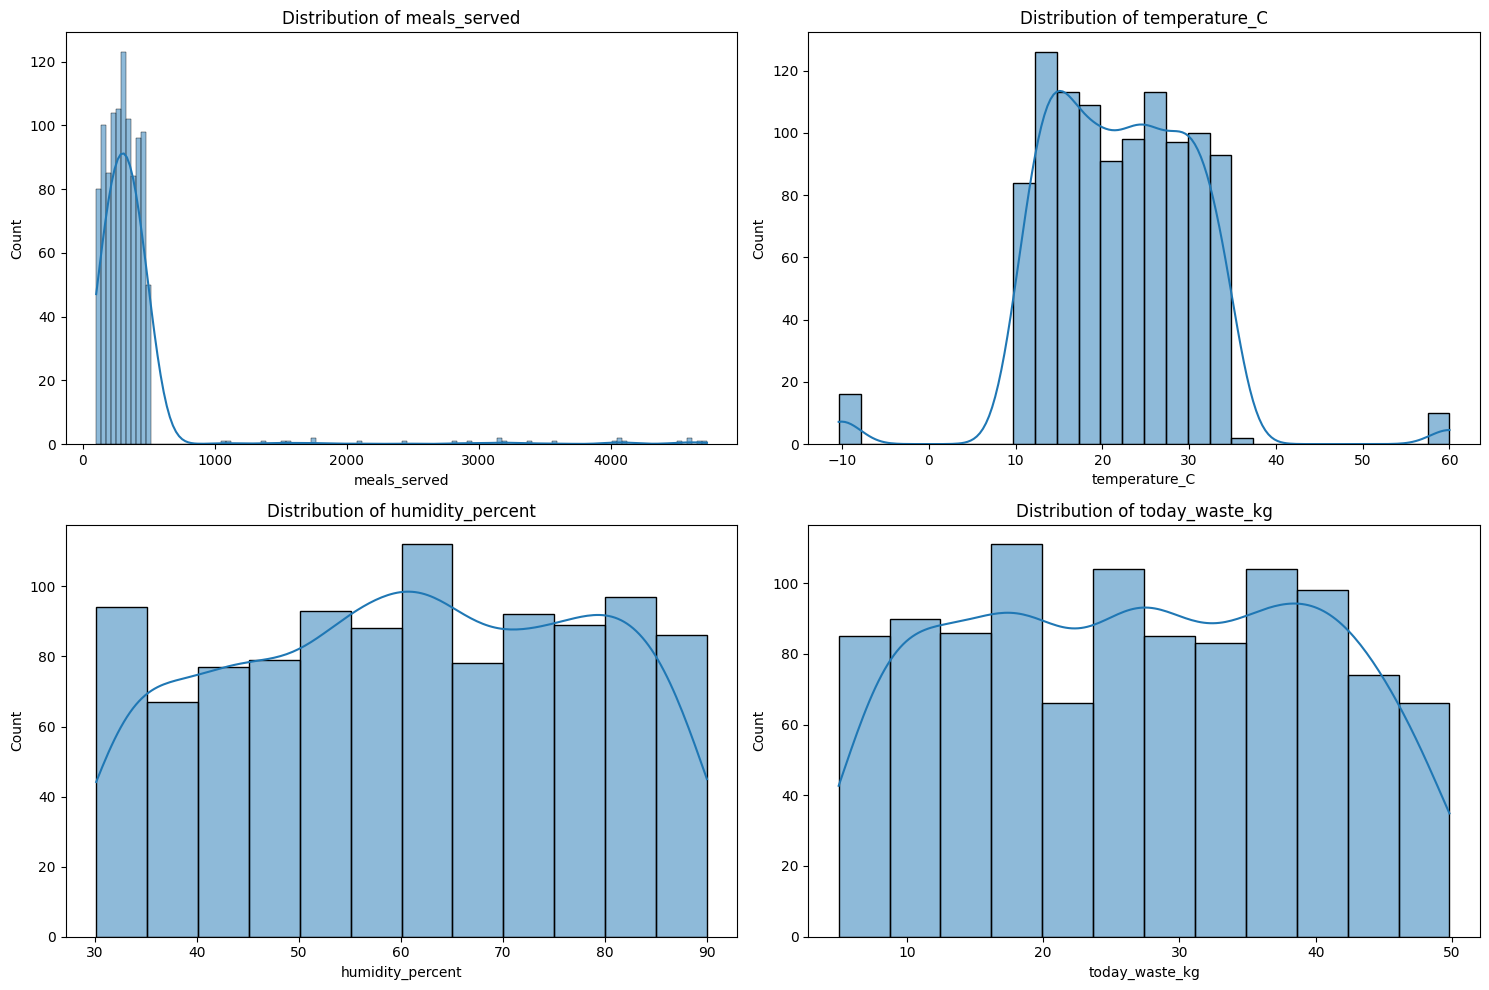

In [438]:
cols_for_hist_box = ['meals_served', 'temperature_C', 'humidity_percent', 'today_waste_kg']



# Univariate Analysis: Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_for_hist_box):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



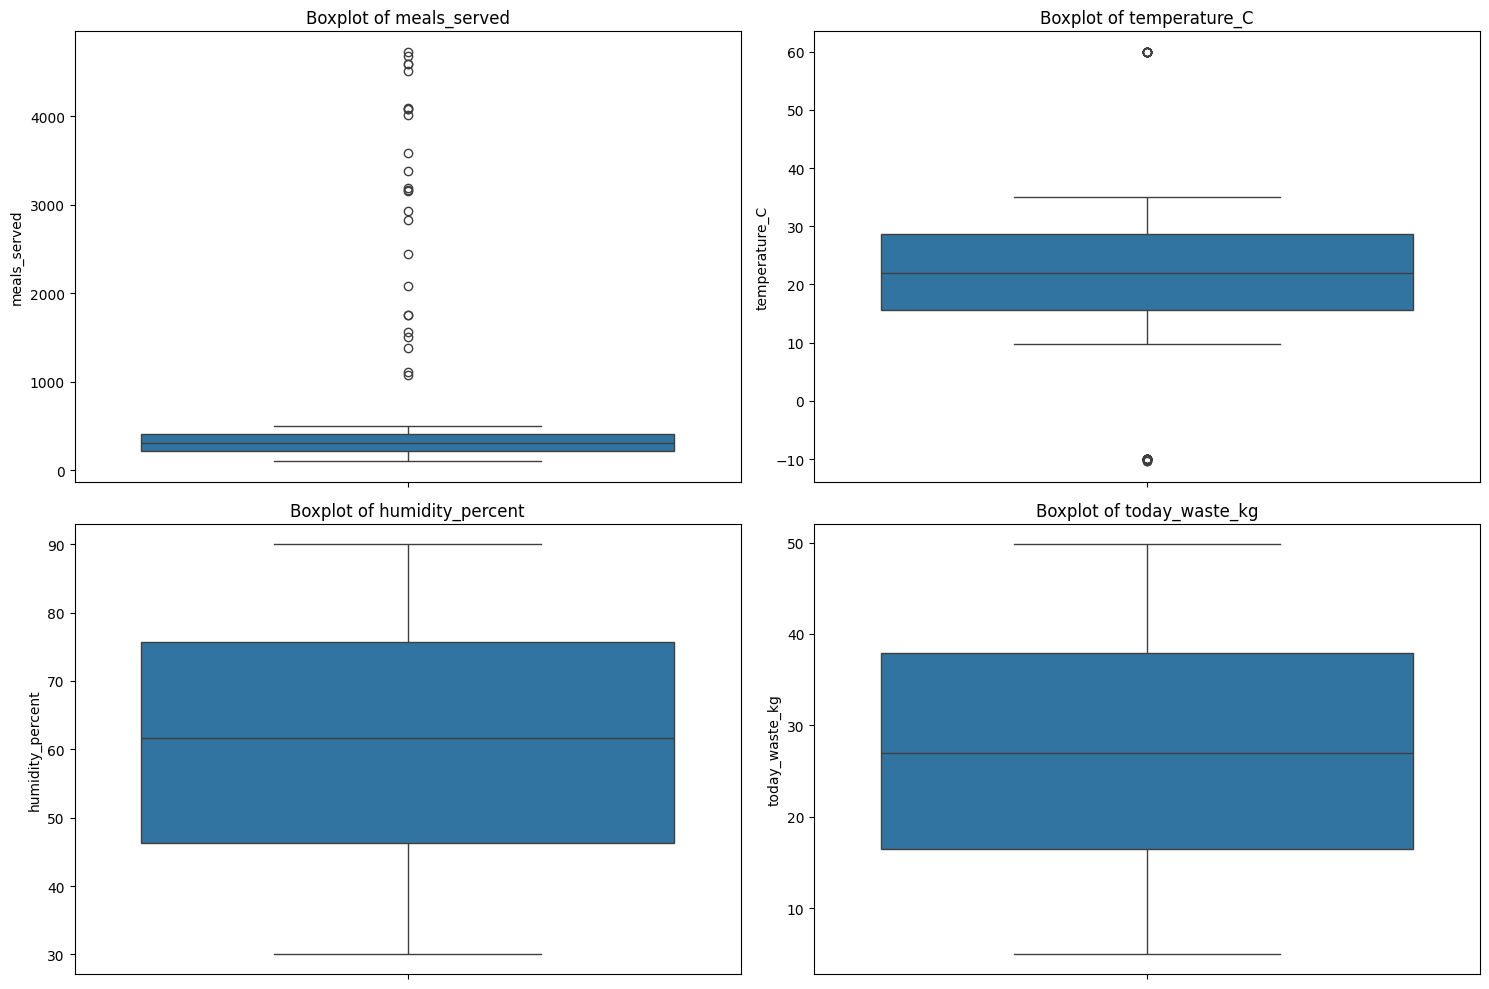

In [439]:

# Univariate Analysis: Boxplots for numerical features to visualize the distribution of the data.
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_for_hist_box):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

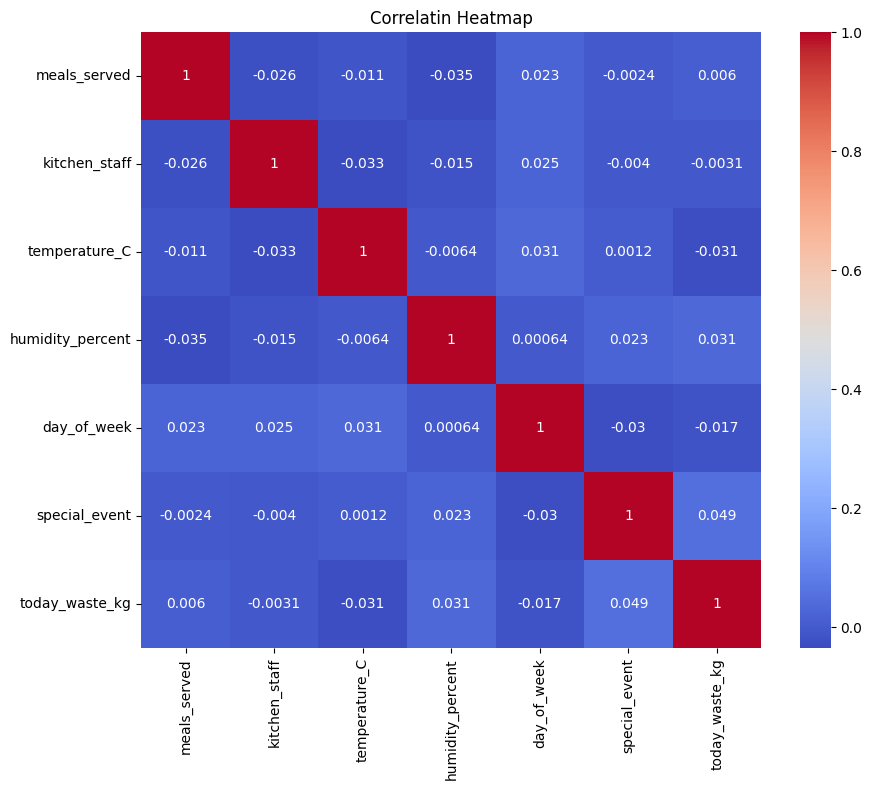

In [440]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlatin Heatmap')
plt.show()

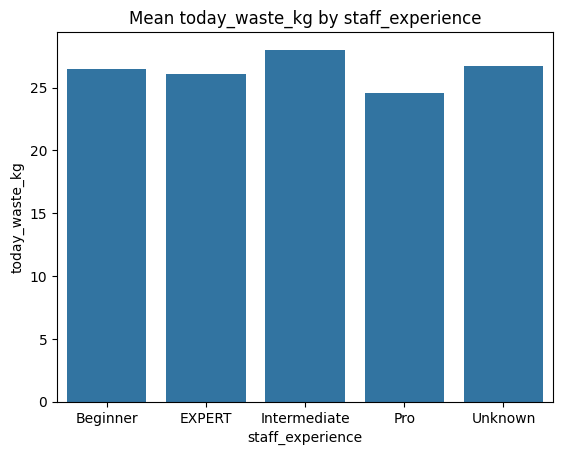

In [441]:
# Bar plot
df_grouped_last = df.groupby('staff_experience')['today_waste_kg'].mean().reset_index()
sns.barplot(y='today_waste_kg', x='staff_experience', data=df_grouped_last)
plt.title('Mean today_waste_kg by staff_experience')
plt.show()
